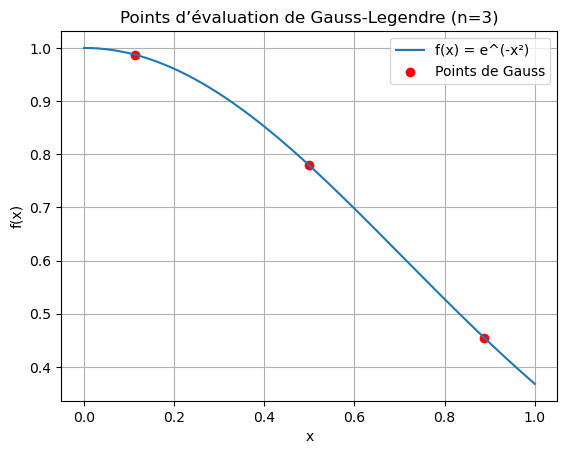

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction à intégrer
f = lambda x: np.exp(-x**2)
a, b = 0, 1

# Points et poids Gauss-Legendre à 3 points
x, w = np.polynomial.legendre.leggauss(3)

# Transformation des points vers [a,b]
x_mapped = 0.5 * (b - a) * (x + 1) + a

# Tracé
X = np.linspace(a, b, 200)
plt.plot(X, f(X), label="f(x) = e^(-x²)")
plt.scatter(x_mapped, f(x_mapped), color='red', label="Points de Gauss")
plt.title("Points d’évaluation de Gauss-Legendre (n=3)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
